# Задание №8
Реализовать синтезирование лиц из LFW с помощью DCGAN
Библиотеки: [Python, Tensorflow]

## Переключение версии TensorFlow

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

## Загрузка и подготовка датасета LFW

In [0]:
train_ds, ds_info = tfds.load(
    'lfw',
    with_info=True,
    split='train'
)

In [4]:
train_x = [tf.image.rgb_to_grayscale(x['image'].numpy().reshape(250, 250, 3)) for x in train_ds]
print(train_x[0].shape, train_x[0].dtype)

(250, 250, 1) <dtype: 'uint8'>


In [5]:
len(train_x)

13233

## Визуализация датасета LFW

In [0]:
def plot_pics(samples):
    fig = plt.figure(figsize=(20, 20))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(6, 8, j+1)
        ax.imshow(samples[j, ...].reshape(28, 28), cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()

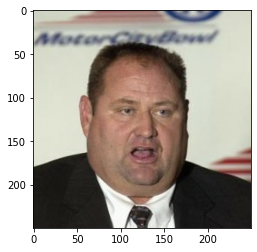

In [7]:
for example in train_ds.take(1):
    image = example['image']
    plt.imshow(image.numpy().astype(np.float32)/255)

## Создание Генератора и Дискриминатора

In [0]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(128*7*7, activation='relu'),
    tf.keras.layers.Reshape((7, 7, 128)),
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.ReLU(),    
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.ReLU(),    
    tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='tanh'),
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Dropout(0.25),    
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1))),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
])

## Подготовка пайплайна данных и оптимизатора

In [0]:
def prepare(img):
  img = tf.cast(img, tf.float32) / 255.
  return tf.image.resize(img, (28, 28))

In [0]:
INPUT_DIM = 100
NUM_EPOCHS = 50
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x)
train_ds = train_ds.shuffle(buffer_size=len(train_x))
train_ds = train_ds.map(prepare)
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
sigmoid_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

## Обучение

[Step  0] D Loss: 1.0982; G Loss: 0.6740


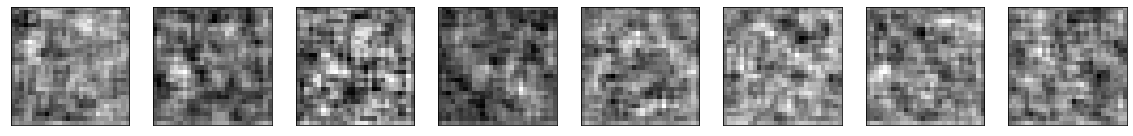

[Step 500] D Loss: 0.2668; G Loss: 0.7486


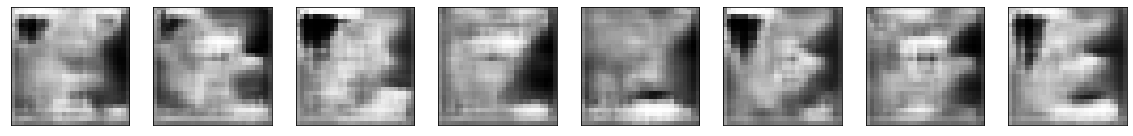

[Step 1000] D Loss: 0.2537; G Loss: 4.2802


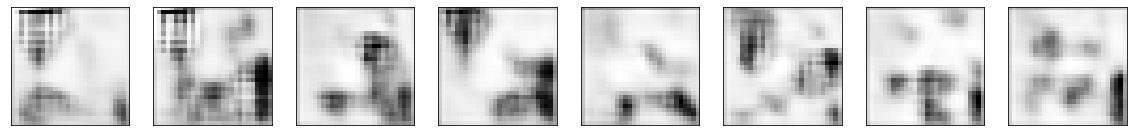

[Step 1500] D Loss: 0.2915; G Loss: 1.3584


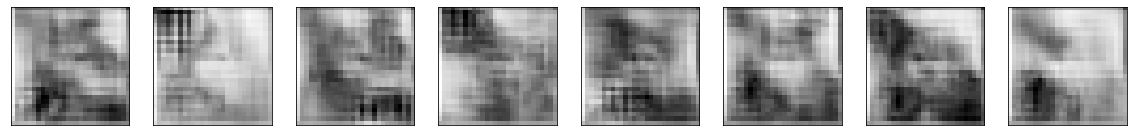

[Step 2000] D Loss: 0.3042; G Loss: 0.9033


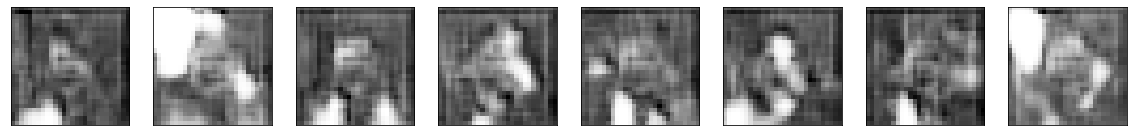

[Step 2500] D Loss: 0.5344; G Loss: 1.2650


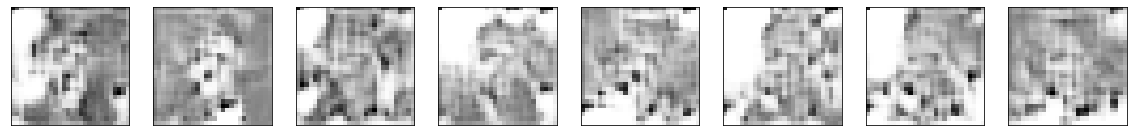

[Step 3000] D Loss: 0.6783; G Loss: 1.2848


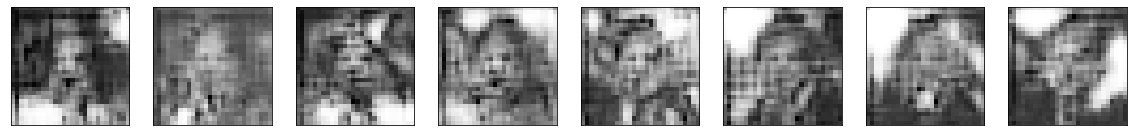

[Step 3500] D Loss: 1.0822; G Loss: 0.3432


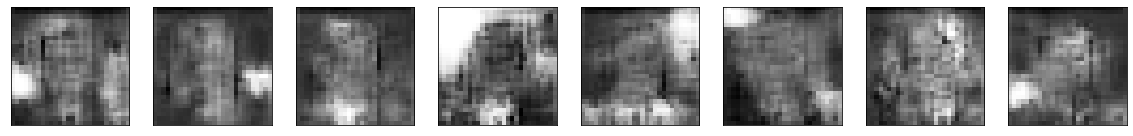

[Step 4000] D Loss: 0.7930; G Loss: 0.5317


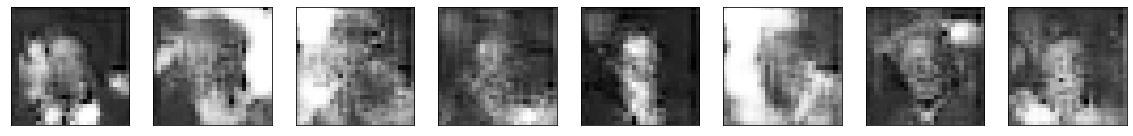

[Step 4500] D Loss: 0.4100; G Loss: 1.1044


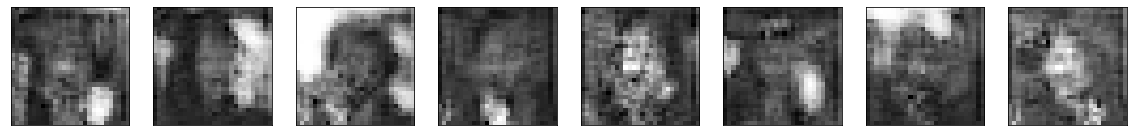

[Step 5000] D Loss: 0.6871; G Loss: 1.0931


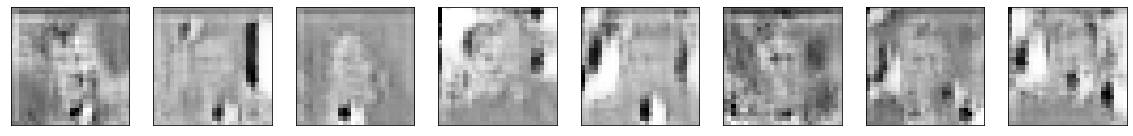

[Step 5500] D Loss: 0.3601; G Loss: 1.7418


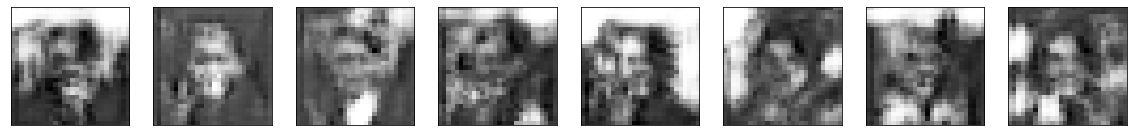

[Step 6000] D Loss: 0.5383; G Loss: 1.5330


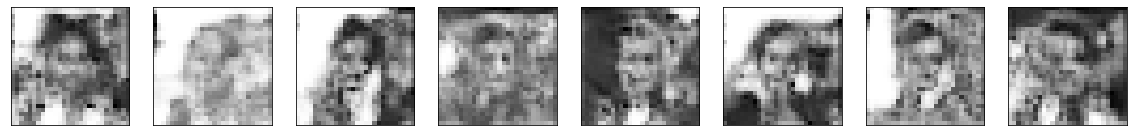

[Step 6500] D Loss: 0.6273; G Loss: 2.1256


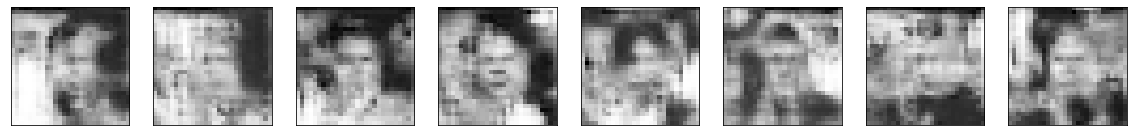

[Step 7000] D Loss: 0.4336; G Loss: 1.3319


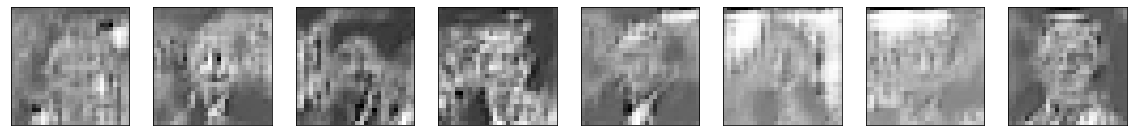

[Step 7500] D Loss: 0.2778; G Loss: 2.1021


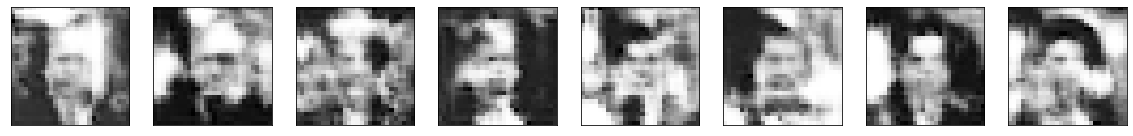

[Step 8000] D Loss: 0.5754; G Loss: 3.2285


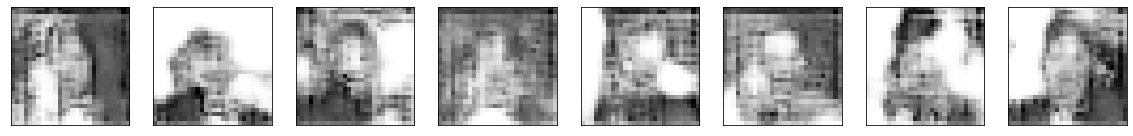

[Step 8500] D Loss: 0.3562; G Loss: 0.8093


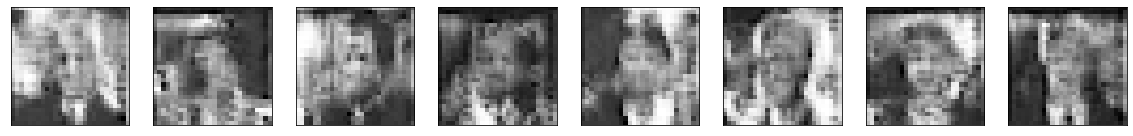

[Step 9000] D Loss: 0.5201; G Loss: 1.6667


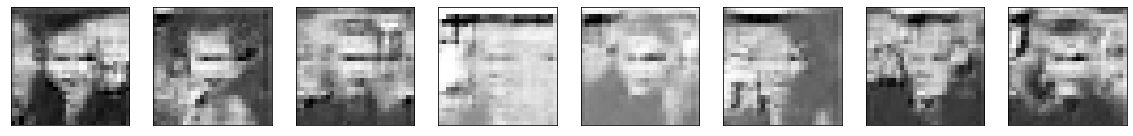

[Step 9500] D Loss: 0.4381; G Loss: 1.7745


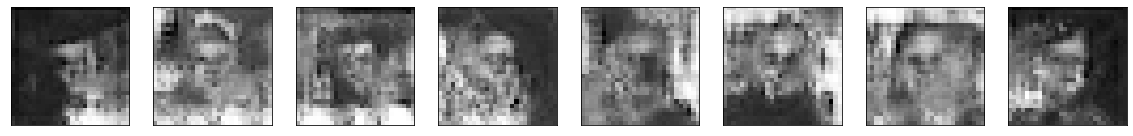

[Step 10000] D Loss: 0.5504; G Loss: 2.0766


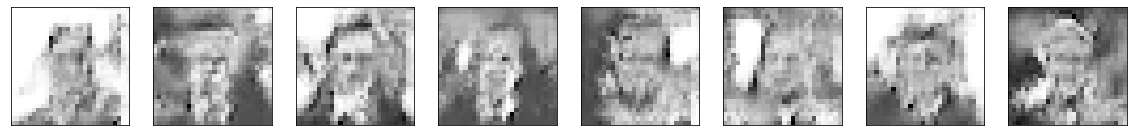

[Step 10500] D Loss: 0.3976; G Loss: 0.9819


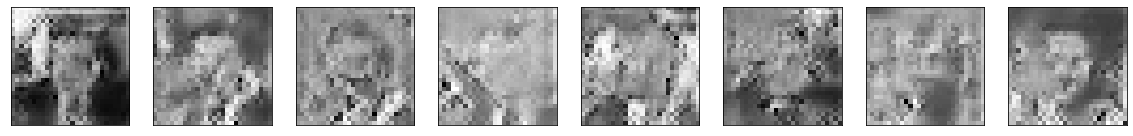

[Step 11000] D Loss: 0.4946; G Loss: 1.2973


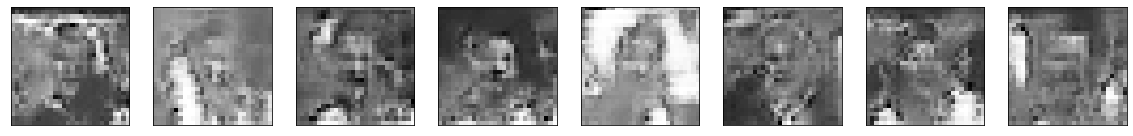

[Step 11500] D Loss: 0.8428; G Loss: 1.1697


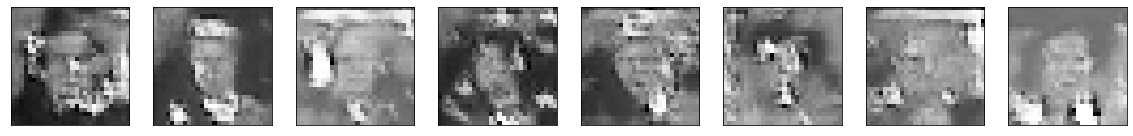

[Step 12000] D Loss: 0.6420; G Loss: 1.6269


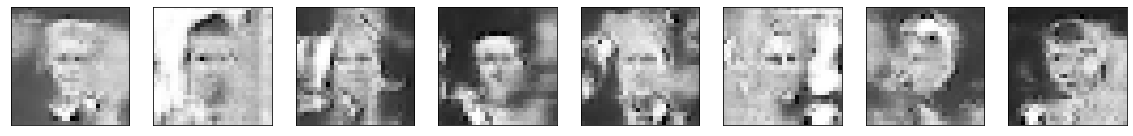

[Step 12500] D Loss: 0.4446; G Loss: 1.0240


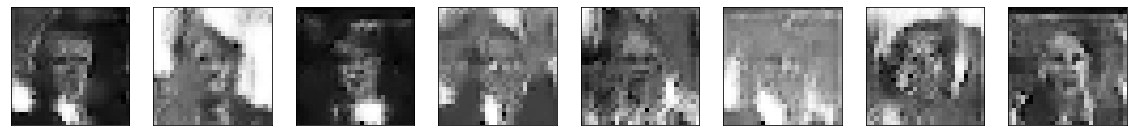

[Step 13000] D Loss: 0.6761; G Loss: 1.0087


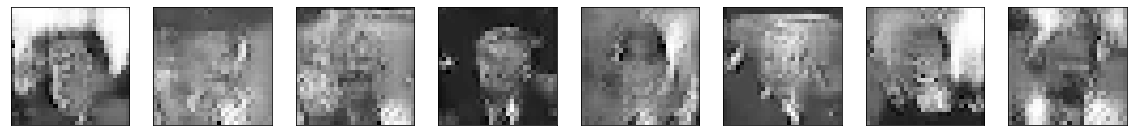

[Step 13500] D Loss: 0.6248; G Loss: 1.4849


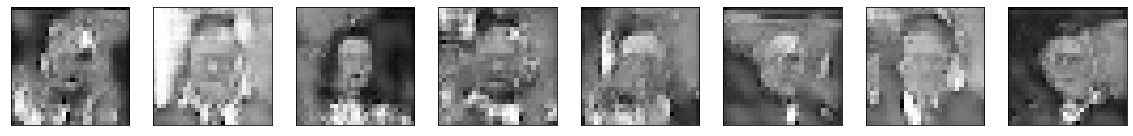

[Step 14000] D Loss: 0.7384; G Loss: 1.3383


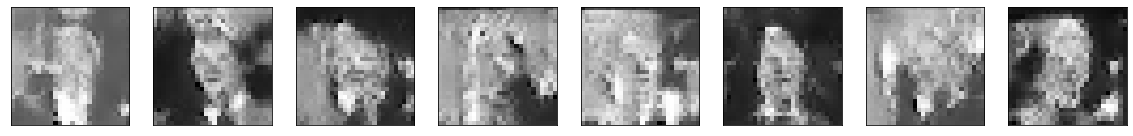

[Step 14500] D Loss: 0.5030; G Loss: 0.9879


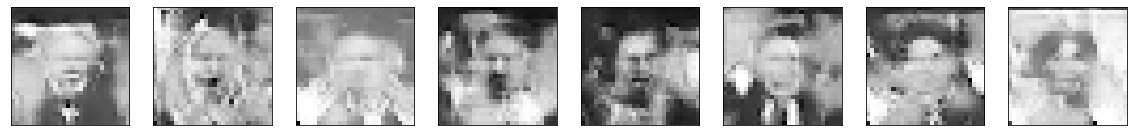

[Step 15000] D Loss: 0.4047; G Loss: 1.5275


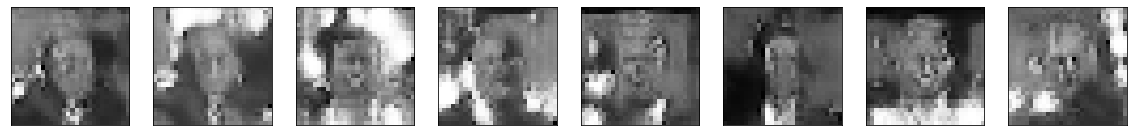

[Step 15500] D Loss: 0.8146; G Loss: 1.0266


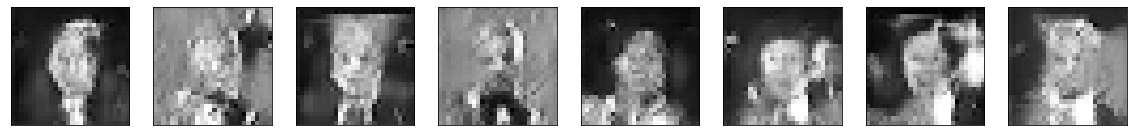

[Step 16000] D Loss: 0.8444; G Loss: 1.1046


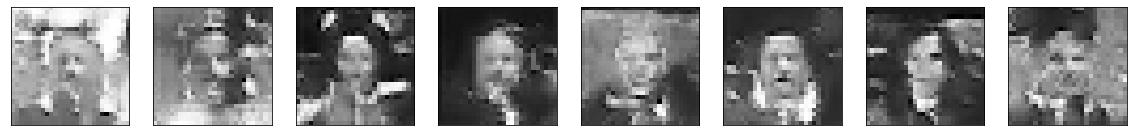

[Step 16500] D Loss: 0.6522; G Loss: 1.0462


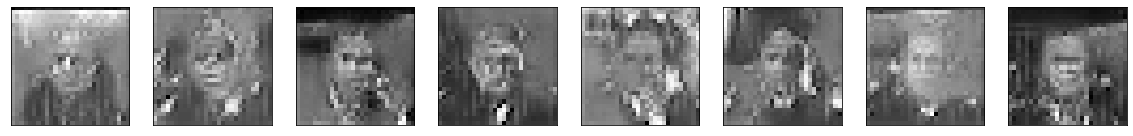

[Step 17000] D Loss: 0.5587; G Loss: 1.2800


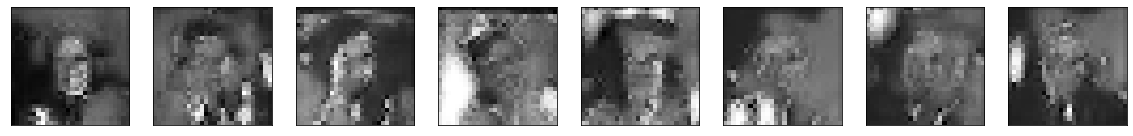

[Step 17500] D Loss: 0.5628; G Loss: 1.1931


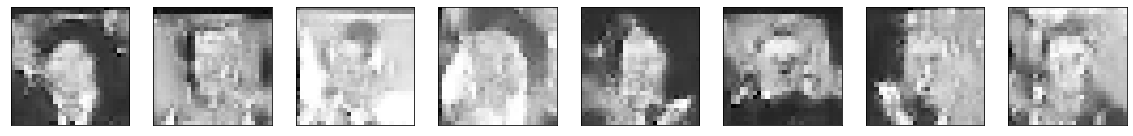

[Step 18000] D Loss: 0.4280; G Loss: 1.6494


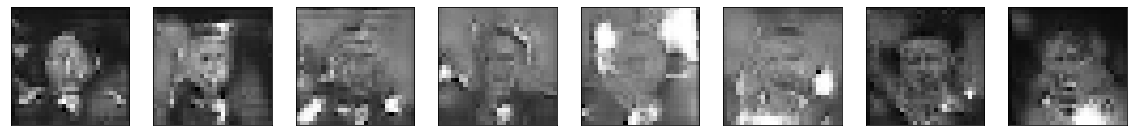

[Step 18500] D Loss: 0.6149; G Loss: 0.8909


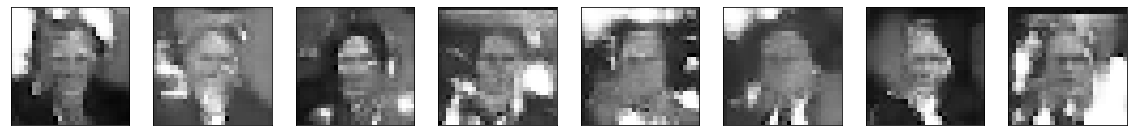

[Step 19000] D Loss: 0.7413; G Loss: 1.2251


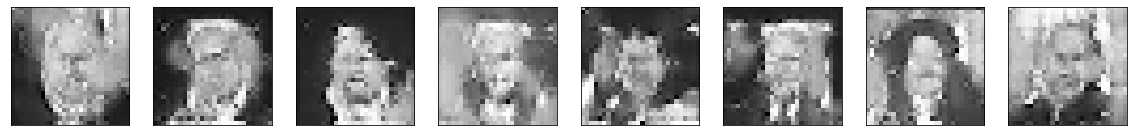

[Step 19500] D Loss: 0.4791; G Loss: 0.9736


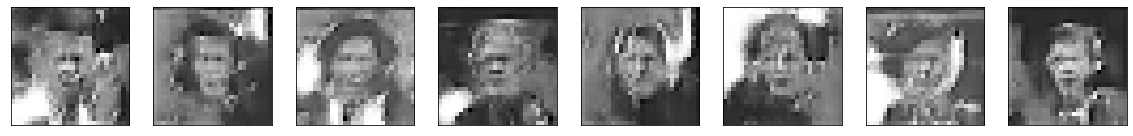

[Step 20000] D Loss: 0.7288; G Loss: 1.1319


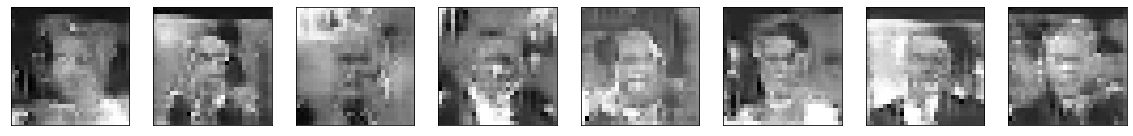

[Step 20500] D Loss: 0.8902; G Loss: 0.8930


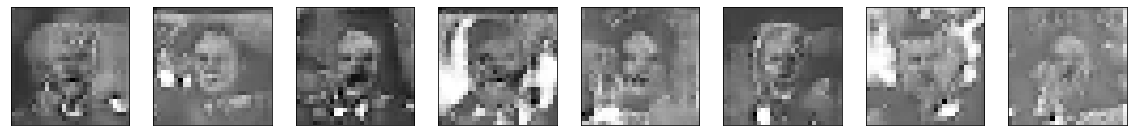

[Step 21000] D Loss: 0.5457; G Loss: 1.1723


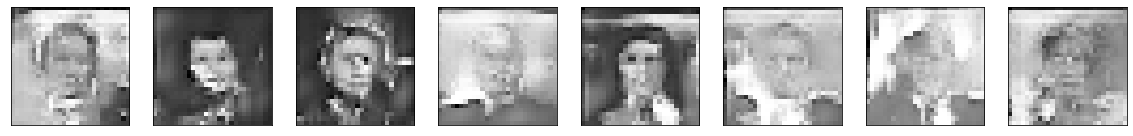

[Step 21500] D Loss: 0.6647; G Loss: 0.8809


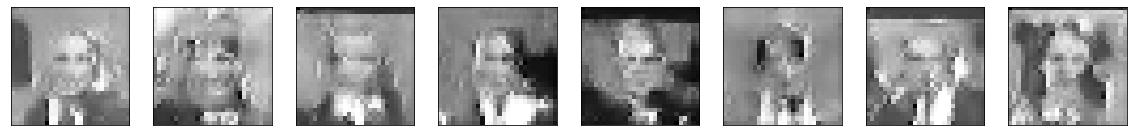

[Step 22000] D Loss: 0.4285; G Loss: 1.1972


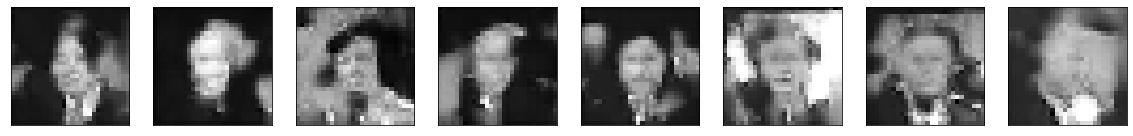

[Step 22500] D Loss: 0.5217; G Loss: 1.5266


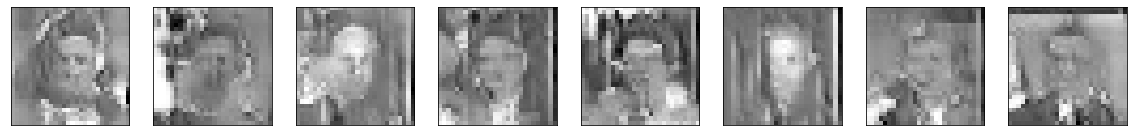

[Step 23000] D Loss: 0.7179; G Loss: 1.0208


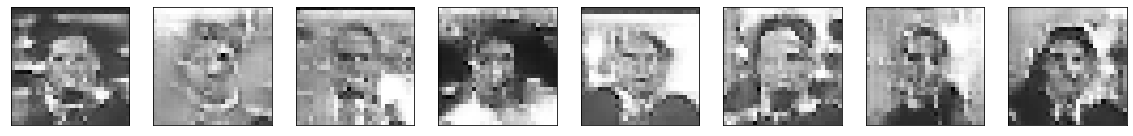

[Step 23500] D Loss: 0.5497; G Loss: 0.8842


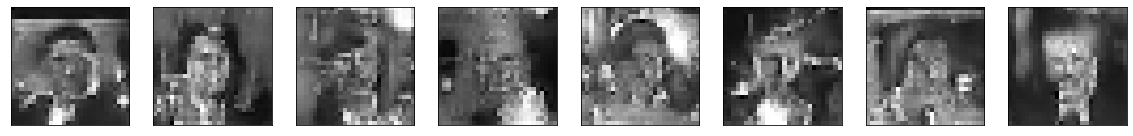

[Step 24000] D Loss: 0.9096; G Loss: 0.3110


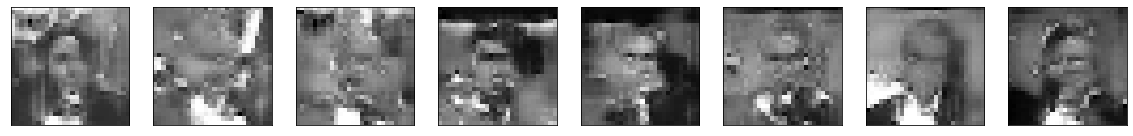

[Step 24500] D Loss: 0.7307; G Loss: 0.8334


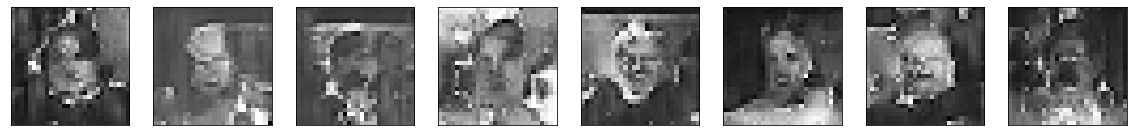

[Step 25000] D Loss: 0.5627; G Loss: 0.8214


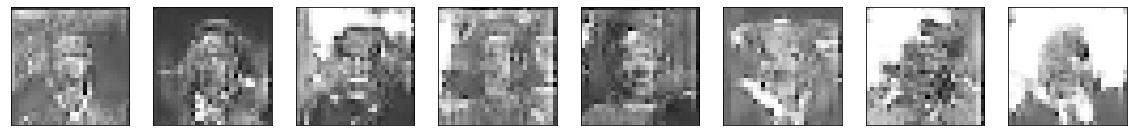

[Step 25500] D Loss: 0.5770; G Loss: 1.1218


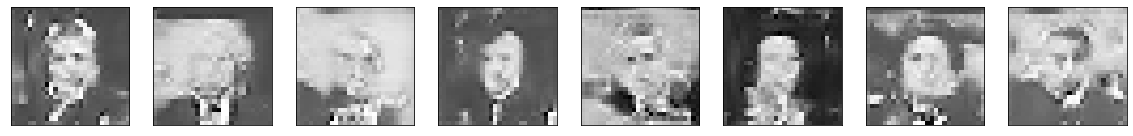

[Step 26000] D Loss: 0.5502; G Loss: 0.8754


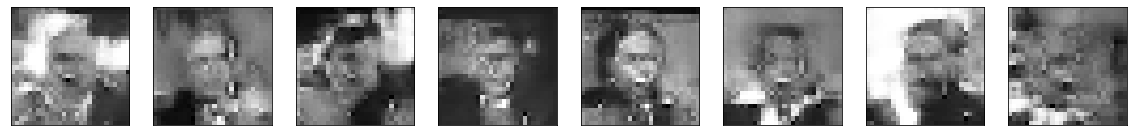

[Step 26500] D Loss: 0.7351; G Loss: 0.9869


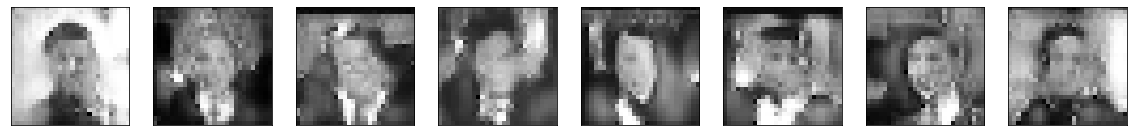

[Step 27000] D Loss: 0.6208; G Loss: 0.7391


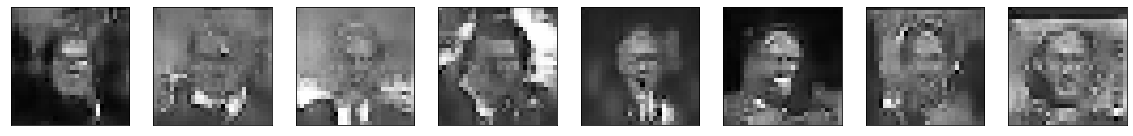

[Step 27500] D Loss: 0.4817; G Loss: 1.4361


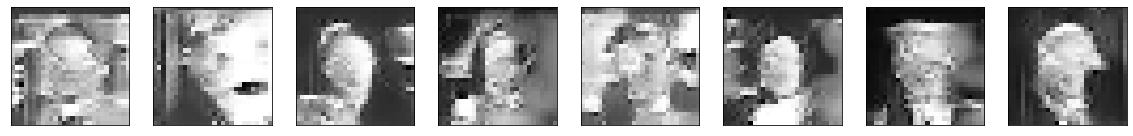

[Step 28000] D Loss: 0.4271; G Loss: 1.8751


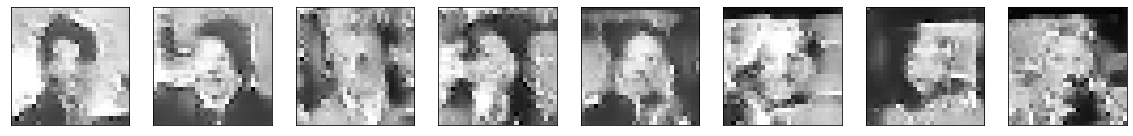

[Step 28500] D Loss: 0.5834; G Loss: 0.8584


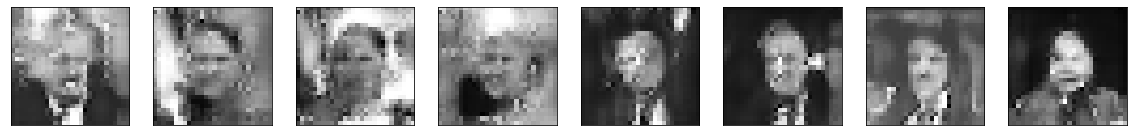

[Step 29000] D Loss: 0.4243; G Loss: 1.4015


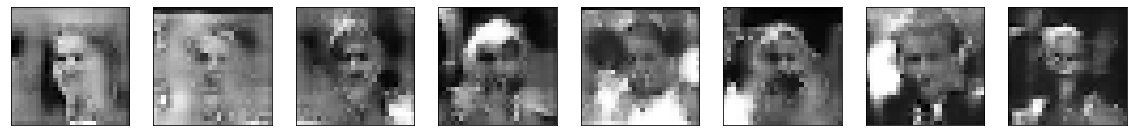

[Step 29500] D Loss: 0.5979; G Loss: 1.1426


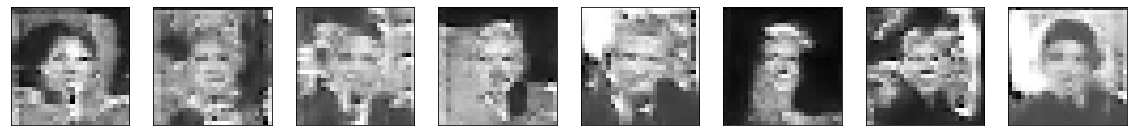

[Step 30000] D Loss: 0.6671; G Loss: 0.7425


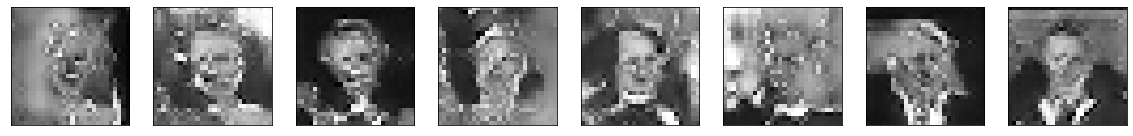

[Step 30500] D Loss: 0.5873; G Loss: 0.7997


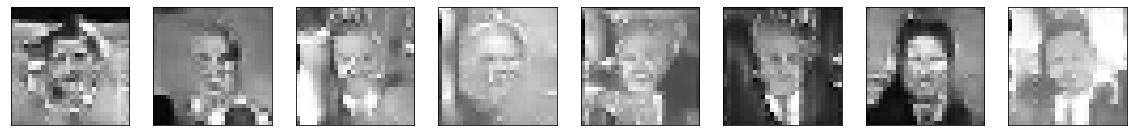

[Step 31000] D Loss: 0.5791; G Loss: 0.9259


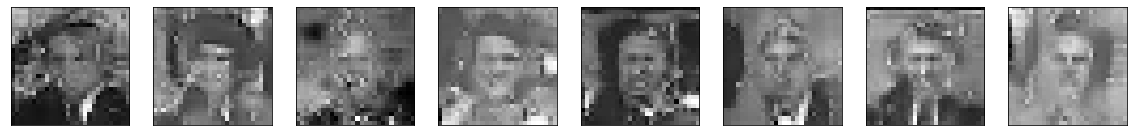

[Step 31500] D Loss: 0.6572; G Loss: 0.9605


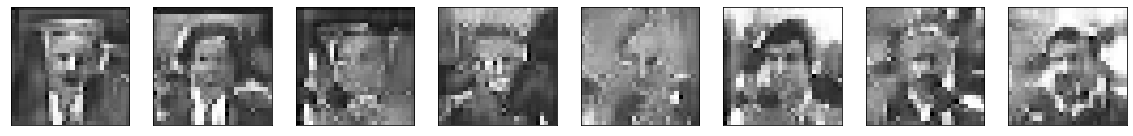

[Step 32000] D Loss: 0.6606; G Loss: 0.9951


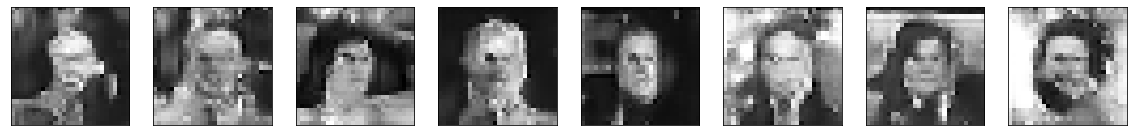

[Step 32500] D Loss: 0.6389; G Loss: 0.8719


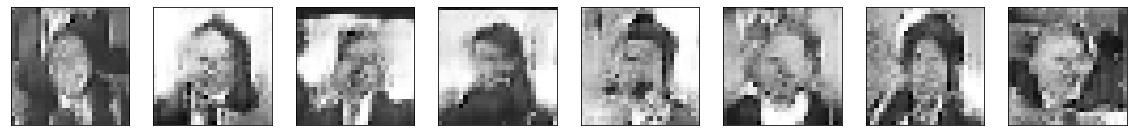

[Step 33000] D Loss: 0.7068; G Loss: 0.8627


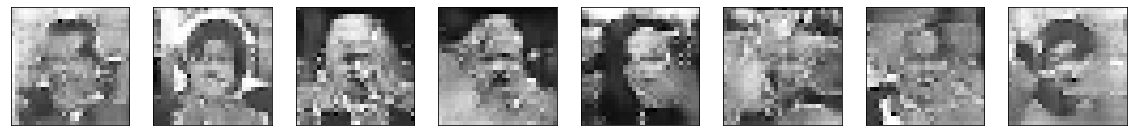

[Step 33500] D Loss: 0.5523; G Loss: 0.9421


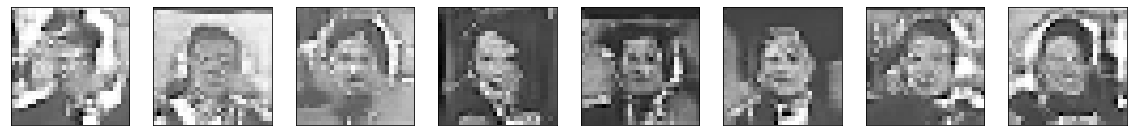

[Step 34000] D Loss: 0.5772; G Loss: 0.8508


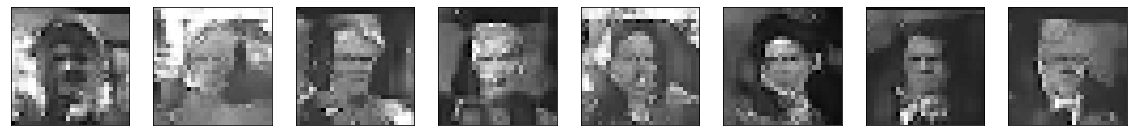

[Step 34500] D Loss: 0.6673; G Loss: 0.9363


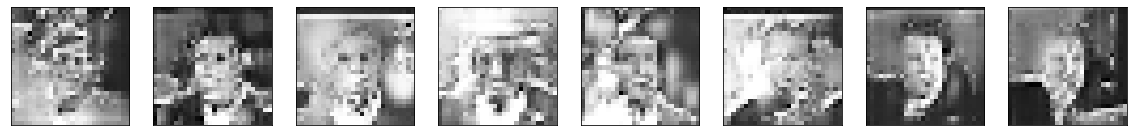

[Step 35000] D Loss: 0.7117; G Loss: 0.7321


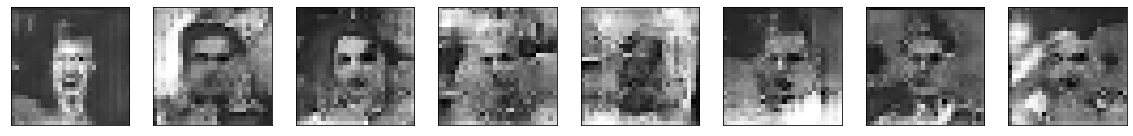

[Step 35500] D Loss: 0.6137; G Loss: 0.9537


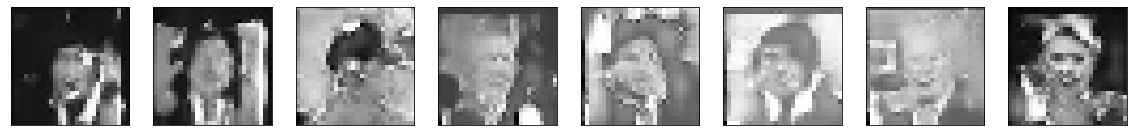

[Step 36000] D Loss: 0.5612; G Loss: 0.9699


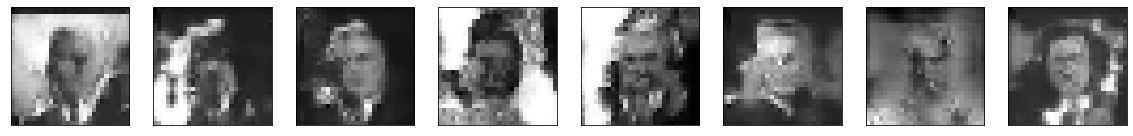

[Step 36500] D Loss: 0.6200; G Loss: 1.0939


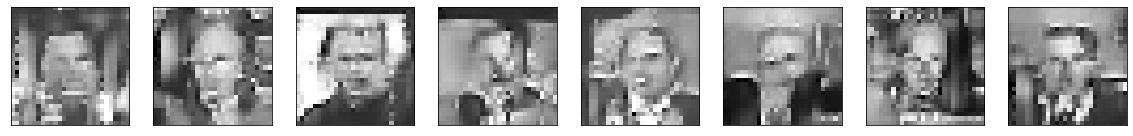

[Step 37000] D Loss: 0.5861; G Loss: 0.8537


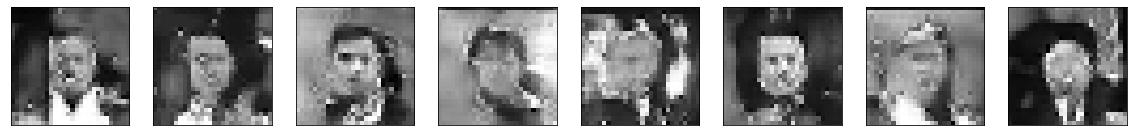

[Step 37500] D Loss: 0.6510; G Loss: 0.8528


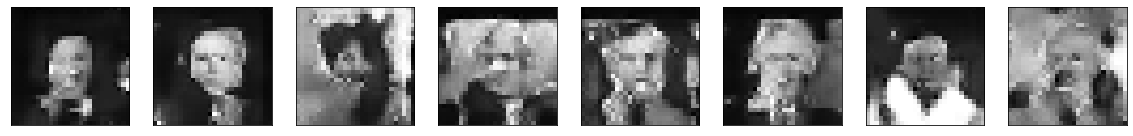

[Step 38000] D Loss: 0.6613; G Loss: 0.8570


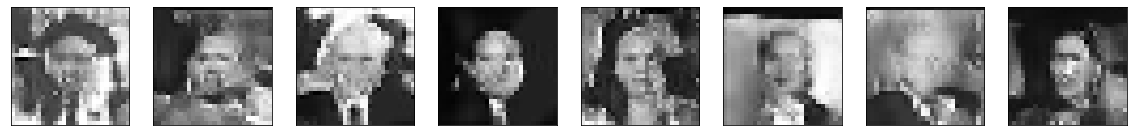

[Step 38500] D Loss: 0.6572; G Loss: 0.8100


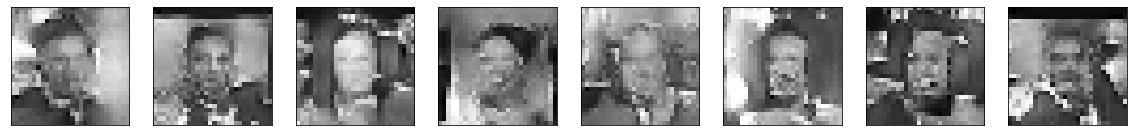

[Step 39000] D Loss: 0.5874; G Loss: 0.9036


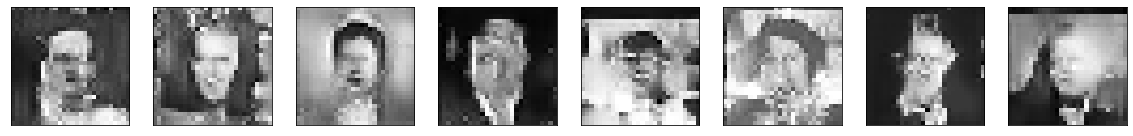

[Step 39500] D Loss: 0.5903; G Loss: 0.8015


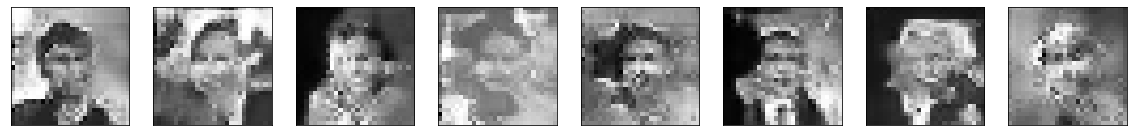

[Step 40000] D Loss: 0.6391; G Loss: 0.6248


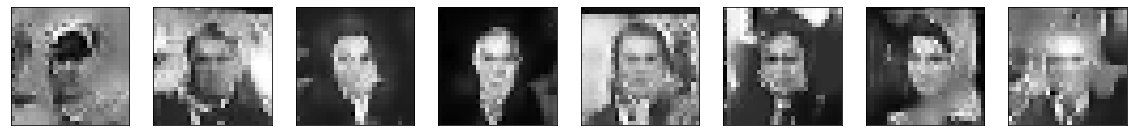

[Step 40500] D Loss: 0.6601; G Loss: 0.9602


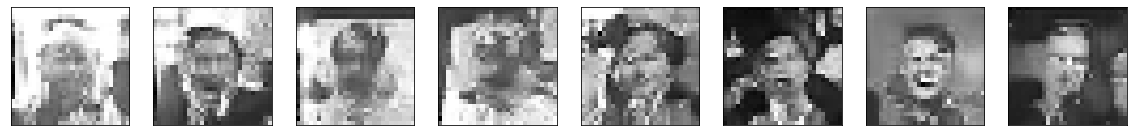

[Step 41000] D Loss: 0.6761; G Loss: 0.8596


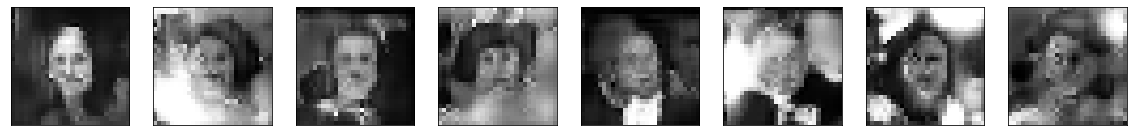

In [11]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1), np.float32), 
        np.zeros((HALF_BATCH_SIZE, 1), np.float32)))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined, training=True)
        d_loss_value = sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1), np.float32)
    
    with tf.GradientTape() as tape:
        syntetic = generator(noise, training=True)
        logits = discriminator(syntetic, training=False)
        g_loss_value = sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 500 == 0:
        print('[Step %2d] D Loss: %.4f; G Loss: %.4f' % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_pics(syntetic_images)


## Тестирование генератора

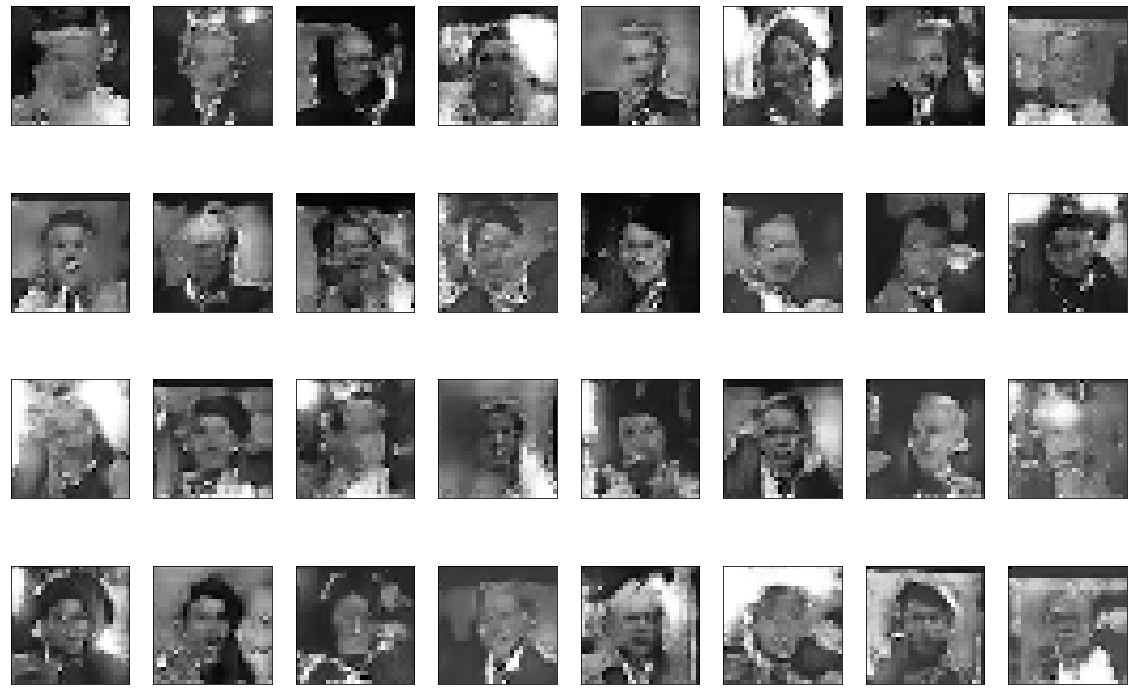

In [12]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_pics(syntetic_images)

## Интерполяция в латентном пространстве

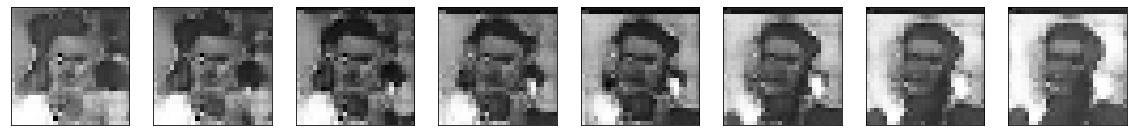

In [13]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 8)
syntetic_images = generator.predict(noise)
plot_pics(syntetic_images)